# Assignment Title:
Predict Customer Churn and Build Insights for Retention

 

# Scenario:
You are tasked with analyzing customer data for a subscription-based service provider to identify patterns, predict churn, and propose retention strategies. Additionally, build a recommendation engine to enhance customer engagement.


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data set

In [3]:
df = pd.read_excel("Assignment_Data.xlsx")

In [4]:
df

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54
...,...,...,...,...,...,...,...,...,...,...,...
195,CUST0196,Male,32,61,113.54,9607.02,Credit Card,Yes,80,39,147
196,CUST0197,Male,47,67,133.12,4380.96,PayPal,No,21,46,62
197,CUST0198,Female,61,9,96.09,1599.30,Credit Card,No,56,23,154
198,CUST0199,Male,24,45,142.44,3527.95,PayPal,Yes,69,15,118


# EDA( Exploratory Data Analysis)

In [5]:
df.shape

(200, 11)

In [6]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
numerical_columns  = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
numerical_columns

['Age',
 'Tenure',
 'MonthlyCharges',
 'TotalCharges',
 'ServiceUsage1',
 'ServiceUsage2',
 'ServiceUsage3']

In [10]:
categorical_columns =  [col for col in df.columns if df[col].dtype == 'object']

In [11]:
categorical_columns

['CustomerID', 'Gender', 'PaymentMethod', 'Churn']

In [12]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


# UNIVARIATE ANALYSIS

In [13]:
df

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54
...,...,...,...,...,...,...,...,...,...,...,...
195,CUST0196,Male,32,61,113.54,9607.02,Credit Card,Yes,80,39,147
196,CUST0197,Male,47,67,133.12,4380.96,PayPal,No,21,46,62
197,CUST0198,Female,61,9,96.09,1599.30,Credit Card,No,56,23,154
198,CUST0199,Male,24,45,142.44,3527.95,PayPal,Yes,69,15,118


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_20140\3839345968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Churn" , data = df , palette = 'Set2')


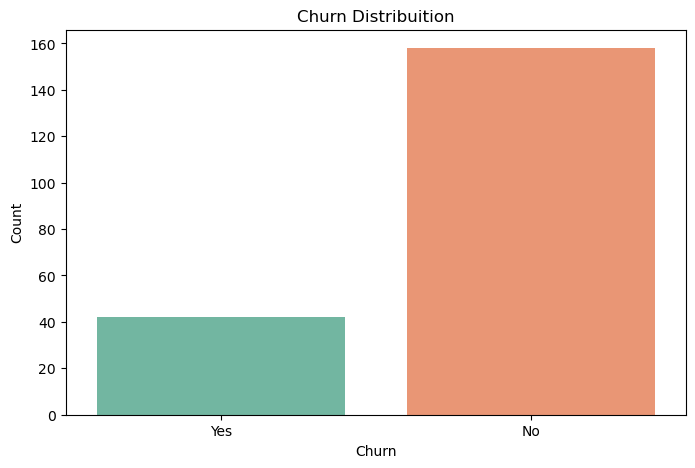

<Figure size 640x480 with 0 Axes>

In [16]:
## Churn Distribuition
plt.figure(figsize = (8,5))
sns.countplot(x = "Churn" , data = df , palette = 'Set2')
plt.title('Churn Distribuition')
plt.xlabel('Churn')
plt.ylabel("Count")
plt.show()
plt.savefig("Churn Distribuition")

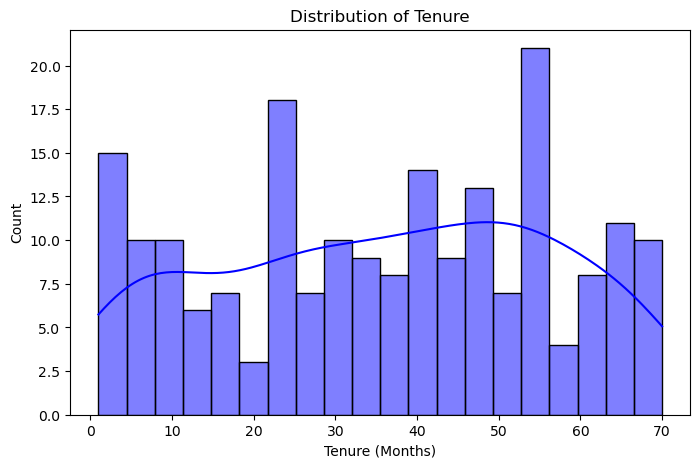

<Figure size 640x480 with 0 Axes>

In [17]:
#Distribuition of Tennure :
plt.figure(figsize = (8,5))
sns.histplot(df['Tenure'] , kde = True , bins = 20 , color = 'blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()
plt.savefig("Distribuition of tennure")

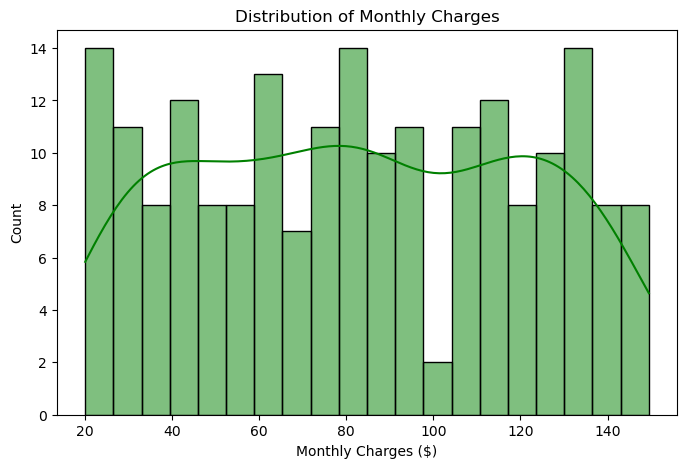

<Figure size 640x480 with 0 Axes>

In [18]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], kde=True, bins=20, color='green')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()
plt.savefig("Distribuition of monthly charges")

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_20140\527868171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Gender" , data = df , palette = 'Set2')


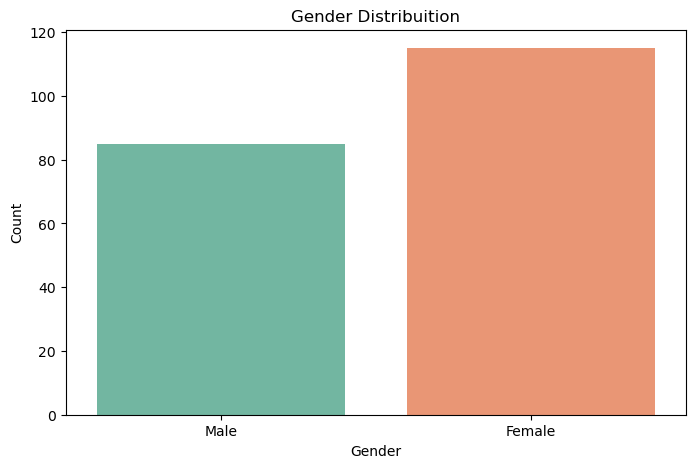

<Figure size 640x480 with 0 Axes>

In [19]:
## Churn Distribuition by gender
plt.figure(figsize = (8,5))
sns.countplot(x = "Gender" , data = df , palette = 'Set2')
plt.title('Gender Distribuition')
plt.xlabel('Gender')
plt.ylabel("Count")
plt.show()
plt.savefig("Churn Distribuition by gender")

# Bivariate Analysis

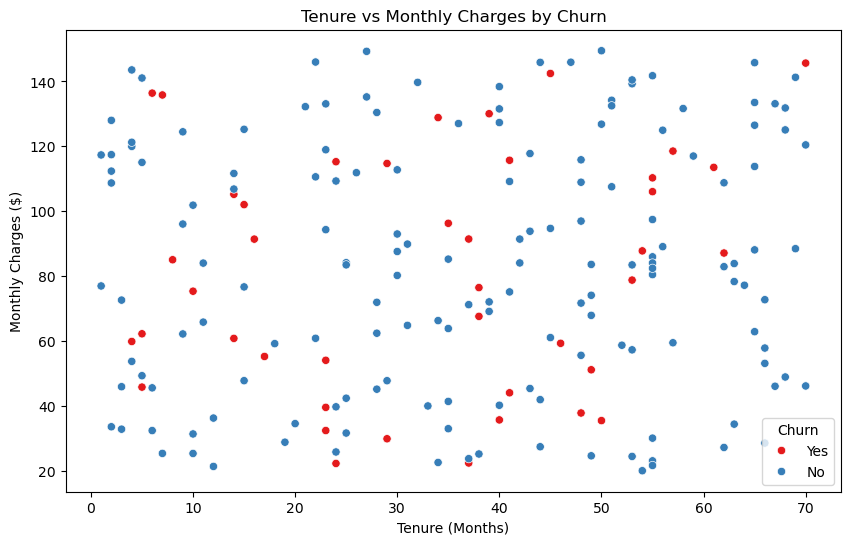

In [75]:
# Relationship between Tenure and Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set1')
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_15436\2865023540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')


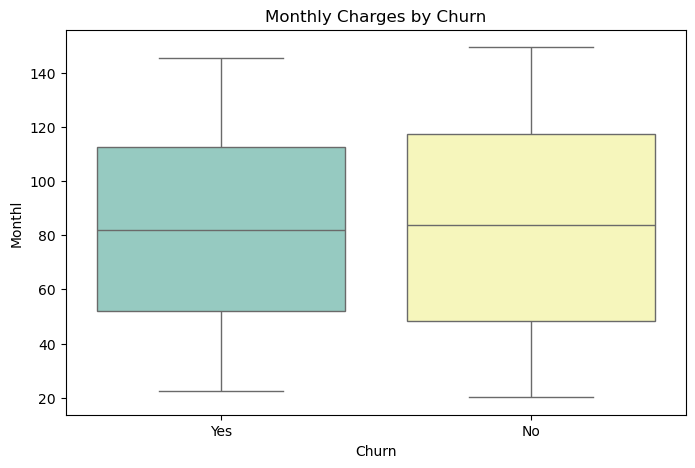

In [76]:
# Boxplot: Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthl')
plt.show()

In [77]:
df.corr(numeric_only=True)


,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
Age,1.000000,-0.028069,0.094284,-0.095752,0.045078,0.005622,0.031344
Tenure,-0.028069,1.000000,0.083596,0.020354,-0.009209,0.006625,0.092429
MonthlyCharges,0.094284,0.083596,1.000000,0.043857,-0.038354,-0.015853,0.153460
TotalCharges,-0.095752,0.020354,0.043857,1.000000,-0.012862,0.064082,0.003402
ServiceUsage1,0.045078,-0.009209,-0.038354,-0.012862,1.000000,-0.020190,0.043973
ServiceUsage2,0.005622,0.006625,-0.015853,0.064082,-0.020190,1.000000,0.091246
ServiceUsage3,0.031344,0.092429,0.153460,0.003402,0.043973,0.091246,1.000000


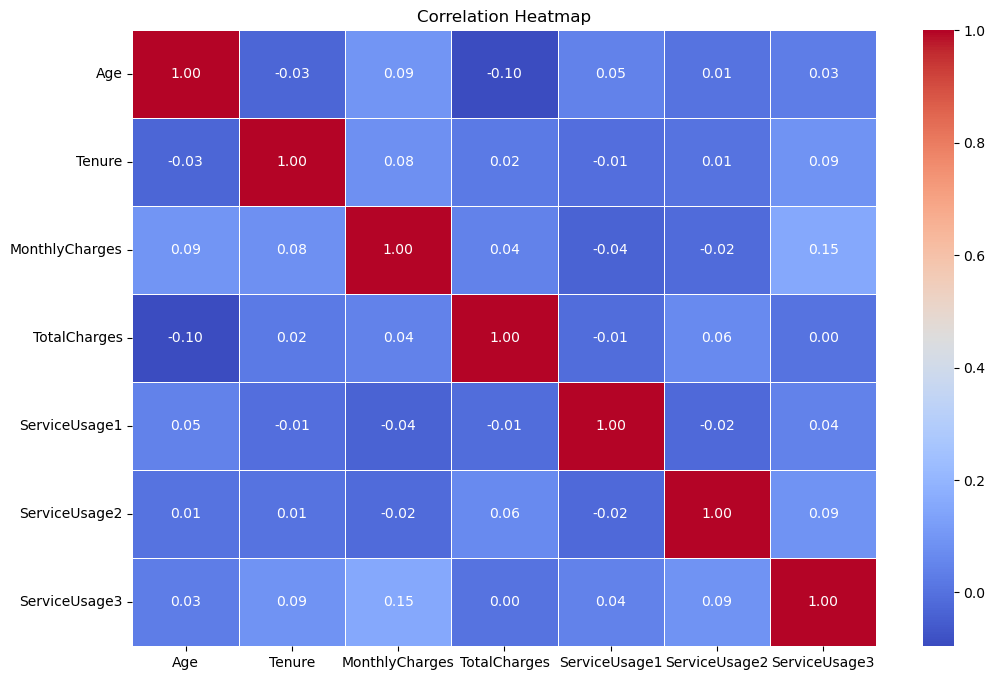

<Figure size 640x480 with 0 Axes>

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig("Corr")

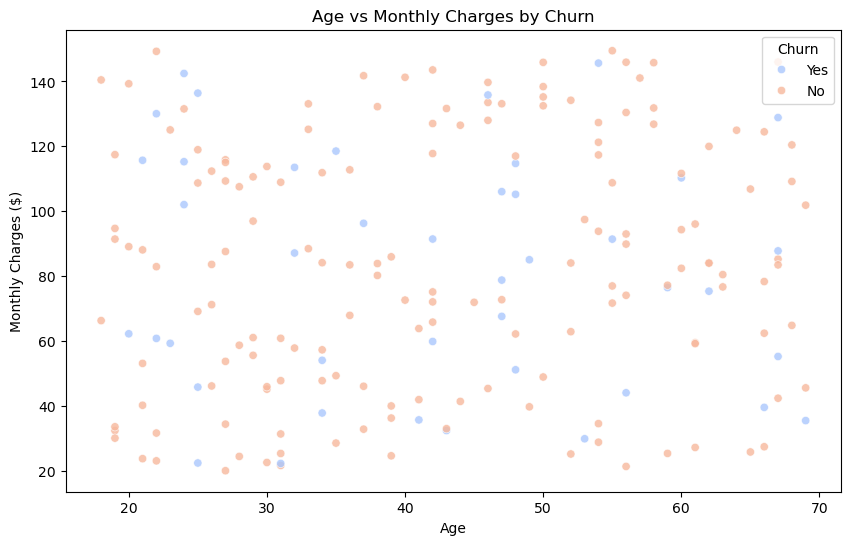

In [79]:
#Age vs. Monthly Charges by Churn
plt.figure(figsize = (10,6))
sns.scatterplot(x='Age', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm', alpha=0.8)
plt.title('Age vs Monthly Charges by Churn')
plt.xlabel('Age')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

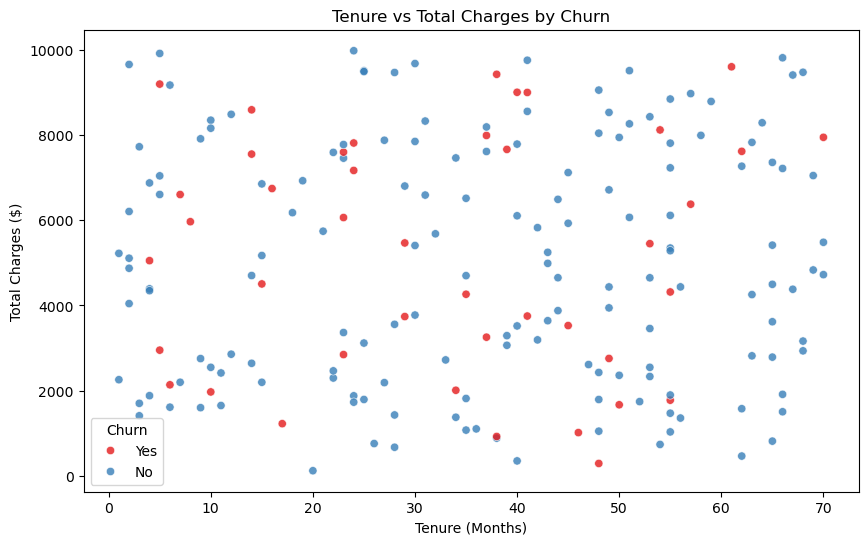

In [80]:
#Tenure vs. Total Charges by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='TotalCharges', hue='Churn', data=df, palette='Set1', alpha=0.8)
plt.title('Tenure vs Total Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges ($)')
plt.legend(title='Churn')
plt.show()


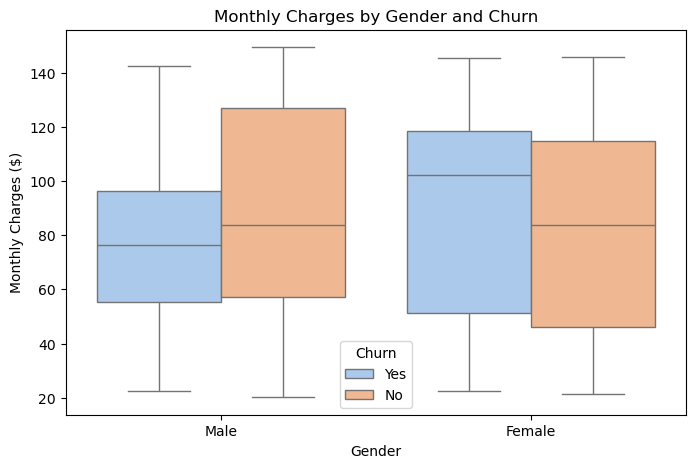

<Figure size 640x480 with 0 Axes>

In [21]:
#Monthly Charges by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='MonthlyCharges', hue='Churn', data=df, palette='pastel')
plt.title('Monthly Charges by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()
plt.savefig("monthly charges")


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_20140\2896709462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='Tenure', label='Churned', shade=True, color='red')
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_20140\2896709462.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 'No'], x='Tenure', label='Retained', shade=True, color='blue')


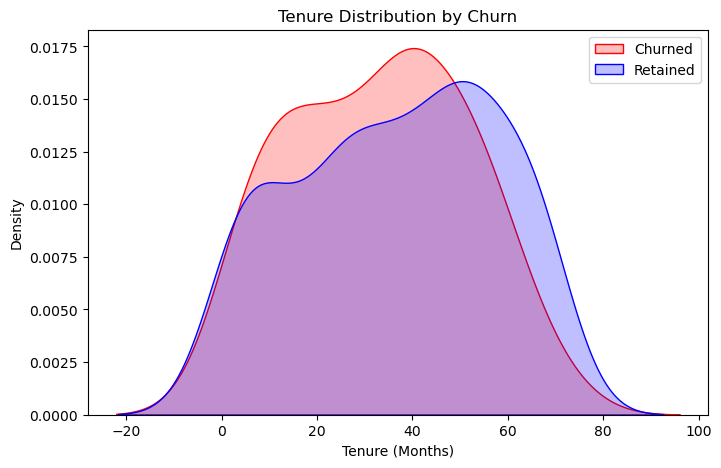

In [22]:
#Tenure Distribution by Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='Tenure', label='Churned', shade=True, color='red')
sns.kdeplot(data=df[df['Churn'] == 'No'], x='Tenure', label='Retained', shade=True, color='blue')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

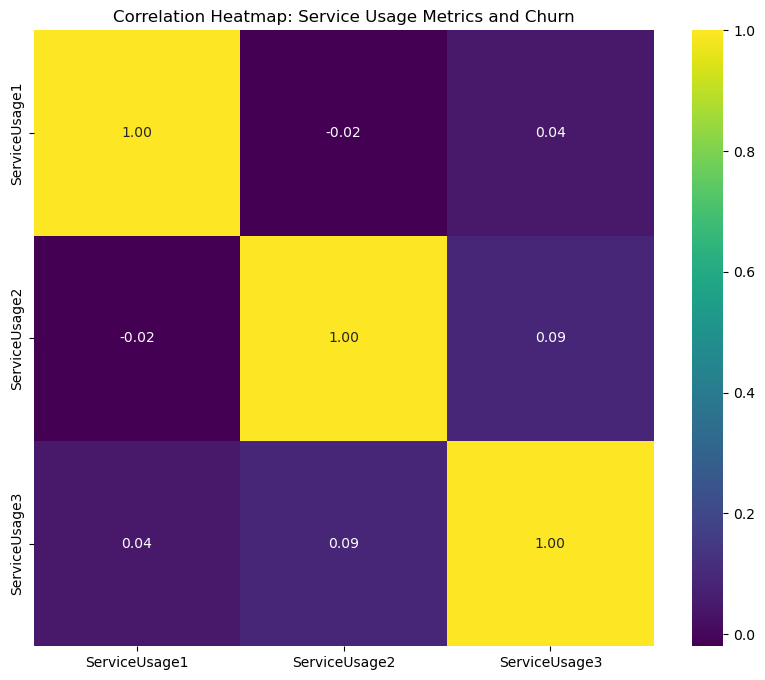

In [23]:
#Correlation Between Service Usage Metrics and Churn
plt.figure(figsize=(10, 8))
sns.heatmap(df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3', 'Churn']].corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap: Service Usage Metrics and Churn')
plt.show()

# insights From EDA 
1. Data Types: The dataset has a mix of numerical and categorical variables:
        a. Numerical: Age, Tenure, MonthlyCharges, TotalCharges, ServiceUsage1, ServiceUsage2, ServiceUsage3.
        b. Categorical: CustomerID, Gender, PaymentMethod, Churn.
2. Missing Values: No missing values are present in the dataset.
3. Statistics----------------------------------------
   a. Age: Ranges from 18 to 69 years with a mean of ~42 years.
   b. Tenure: Ranges from 1 to 70 months with a mean of ~36 months
   c. MonthlyCharges: Vary between $20.16 and $149.44 with a mean of ~$83.
   d. Service Usage: ServiceUsage1, ServiceUsage2, and ServiceUsage3 show diverse usage patterns.

#Univariate Analysis Summary->

Churn:-----

Slightly imbalanced, with more retained customers than churned ones.

-----------------------------------------Tenure:-----------------------------------------------------------------

Customers with shorter tenures are more likely to churn, emphasizing the importance of early retention efforts.

----------------------------------------Monthly Charges-----------------------------------------


Higher monthly charges are associated with churn, suggesting cost dissatisfaction.


------------------------------Total Charges---------------------------------------


Retained customers generally have higher total charges, indicating long-term engagement.


----------------------------------Service Usage:------------------------------------------------


Low service usage correlates with higher churn, highlighting underutilization as a risk factor.


----------------------Categorical Variables:-----------------------------------------------------


No significant trends were observed in gender or similar categorical features directly affecting churn.


#Bivariate Analysis Summary

-----------------------------------------------Tenure vs. Churn:-----------------------------------------------------------


Customers with shorter tenures show significantly higher churn rates, indicating early dissatisfaction or unmet expectations.


--------------------------------------Monthly Charges vs. Churn----------------------------------------------------------------


Higher monthly charges are strongly associated with churn, suggesting that pricing adjustments may be needed.


--------------------------------------Total Charges vs. Churn------------------------------------------------------------------


Churned customers tend to have lower total charges, likely due to early service discontinuation.


------------------------------------Gender vs. Churn--------------------------------------------------------------------------


No significant relationship was found between gender and churn, indicating gender-neutral churn behavior.


------------------------------------Service Usage vs. Churn---------------------------------------------------------------


Lower service utilization strongly correlates with churn, emphasizing the need to boost engagement among low-usage customers.


-----------------------------------------Tenure vs. Total Charges---------------------------------------------------------


Long-tenure customers with higher total charges are less likely to churn, highlighting the value of sustained engagement.







# 2. Feature Engineering

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['AverageSpendPerMonth'] =  df['TotalCharges'] / df['Tenure']
df['AverageSpendPerMonth']

0      590.082000
1      324.371739
2       78.582821
3       55.579149
4       70.057826
          ...    
195    157.492131
196     65.387463
197    177.700000
198     78.398889
199     59.064412
Name: AverageSpendPerMonth, Length: 200, dtype: float64

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_payment_method = LabelEncoder()
df['PaymentMethod'] = le_payment_method.fit_transform(df['PaymentMethod'])

le_churn = LabelEncoder()
df['Churn'] = le_churn.fit_transform(df['Churn'])

In [26]:
#Scale Numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3', 'AverageSpendPerMonth']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Predictive Modeling

In [27]:
#Import Library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix,r2_score , accuracy_score
import xgboost as xgb

In [28]:
#Split The Data

In [29]:
x = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

In [30]:
# Hyperparameter Grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
# Hyperparameter Grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Hyperparameter Grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42)
models = {
    'Logistic Regression': LogisticRegression(C=0.01, max_iter=100, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=5),
    'Random Forest': RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, 
        gamma=0, 
        learning_rate=0.01, 
        max_depth=3, 
        min_child_weight=5, 
        n_estimators=100, 
        scale_pos_weight=2, 
        subsample=0.8
    )
}

In [32]:
# Initialize a list to store metrics for each model
model_metrics = []

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data
    
# Get classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
 # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
# Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred).tolist()
#Store metrics for the current model
    
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (0)': class_report['0']['precision'],
        'Recall (0)': class_report['0']['recall'],
        'F1-Score (0)': class_report['0']['f1-score'],
        'Precision (1)': class_report['1']['precision'],
        'Recall (1)': class_report['1']['recall'],
        'F1-Score (1)': class_report['1']['f1-score'],
        'Confusion Matrix': conf_matrix
    })



C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [33]:

# Create DataFrame from the collected metrics
model_performance = pd.DataFrame(model_metrics)

# Save the DataFrame to a CSV file
model_performance.to_csv('model_performance.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'model_performance.csv'

In [ ]:
model_performance

# Overall Summary:
Logistic Regression and Random Forest both excel at predicting class 0, but both models fail to predict class 1, leading to poor overall performance in imbalanced scenarios.


Decision Tree provides a more balanced performance between classes, with better results for class 1 than the other models, but still needs improvement in precision and recall for class 1.

All models show biases towards class 0, and performance on class 1 needs improvement.

# 4. Model Interpretation


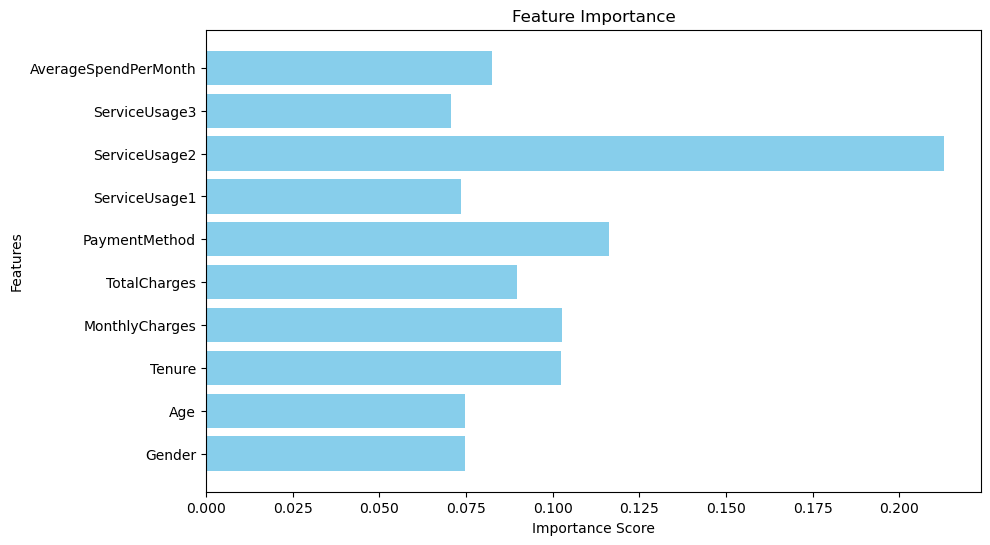

<Figure size 640x480 with 0 Axes>

In [34]:
# Feature importance for Random Forest
rf = models['Random Forest']
importances = rf.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
plt.savefig("Feature importance")

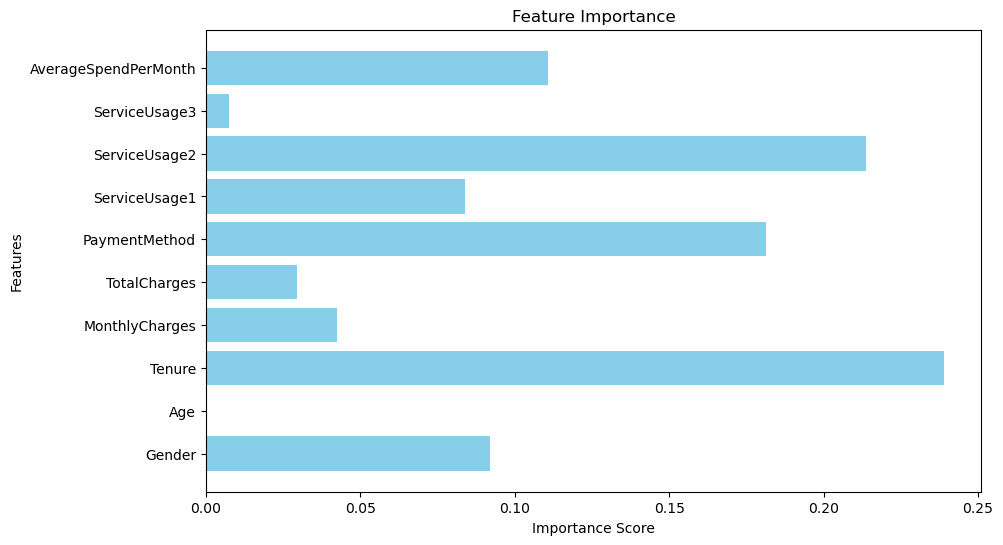

In [96]:
# Feature importance for Random Forest
rf = models['Decision Tree']
importances = rf.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
plt.savefig("feature imp
            ")

# Recommendation Engine

In [97]:
from sklearn.metrics.pairwise import cosine_similarity
# Use service usage data for collaborative filtering
usage_data = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']]
similarity_matrix = cosine_similarity(usage_data)

# Example: Recommend similar customers for customer 0
customer_index = 0
similar_customers = np.argsort(-similarity_matrix[customer_index])[:5]
print(f"Top 5 similar customers for Customer {customer_index}: {similar_customers}")

Top 5 similar customers for Customer 0: [  0  31 187   5  91]


In [100]:
import joblib
# XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'n_estimators': [50, 100, 150]
}

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Set up the models with their respective grids
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Perform Grid Search with Cross-Validation for each model
grid_search_results = {}

for model_name, model in models.items():
    if model_name == 'XGBoost':
        param_grid = xgb_param_grid
    elif model_name == 'Random Forest':
        param_grid = rf_param_grid
    elif model_name == 'Decision Tree':
        param_grid = dt_param_grid
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    # Store the best parameters, score, and model
    grid_search_results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_,
        'Best Model': grid_search.best_estimator_
    }

# Save the best models to .pkl files
for model_name, result in grid_search_results.items():
    model_filename = f"{model_name.lower().replace(' ', '_')}_best_model.pkl"
    joblib.dump(result['Best Model'], model_filename)
    print(f"Saved {model_name} best model to {model_filename}")

# Display the best parameters and scores for each model
for model_name, result in grid_search_results.items():
    print(f"{model_name} Best Params: {result['Best Params']}")
    print(f"{model_name} Best Score: {result['Best Score']}")


Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Himanshu\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Saved XGBoost best model to xgboost_best_model.pkl
Saved Random Forest best model to random_forest_best_model.pkl
Saved Decision Tree best model to decision_tree_best_model.pkl
XGBoost Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 2, 'subsample': 0.7}
XGBoost Best Score: 0.8
Random Forest Best Params: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Best Score: 0.8
Decision Tree Best Params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Best Score: 0.775


# Save the Model

In [ ]:
import joblib
# Save the Random Forest model
joblib.dump(RandomForest , 'random_forest_model.pkl')

# Save Categorical Column

In [99]:
# Save the LabelEncoders
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_payment_method, 'le_payment_method.pkl')
joblib.dump(le_churn, 'le_churn.pkl')

['le_churn.pkl']